In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Path to your file
file_path = './data/unload-blue_log_20240425-155908.txt'
#file_path = './data/unload-red_log_20240425-160743.txt'
#file_path = './data/unload-white_log_20240425-155516.txt'


MM_1_data = {'timestamp': [], 'i1_pos_switch': [], 'i2_pos_switch': [], 'i3_pos_switch': [],
             'i4_light_barrier': [], 'm1_speed': [], 'm2_speed': [], 'm3_speed': [],
             'o7_valve': [], 'o8_compressor': [], 'current_task_duration': []}

HBW_1_data = {
    'timestamp': [], 'i1_light_barrier': [], 'i2_light_barrier': [], 'i3_light_barrier': [],
    'i4_light_barrier': [], 'i5_pos_switch': [], 'i6_pos_switch': [], 'i7_pos_switch': [],
    'i8_pos_switch': [], 'm1_speed': [], 'm2_speed': [], 'm3_speed': [], 'm4_speed': [],
    'current_state': [], 'current_task': [], 'current_task_duration': [], 'current_sub_task': [],
    'current_pos_x': [], 'current_pos_y': [], 'target_pos_x': [], 'target_pos_y': [], 'amount_of_workpieces': []
}

VGR_1_data = {'timestamp': [],
              'i1_pos_switch': [], 'i2_pos_switch': [], 'i3_pos_switch': [], 'i7_light_barrier': [],
              'i4_light_barrier': [],
              'i8_color_sensor': [], 'o7_compressor_level': [], 'o8_valve_open': [], 'm1_speed': [], 'm2_speed': [],
              'm3_speed': [], 'current_state': [], 'current_task': [], 'current_task_duration': [],
              'current_sub_task': [], 'current_pos_x': [], 'current_pos_y': [], 'current_pos_z': [],
              'target_pos_x': [], 'target_pos_y': [], 'target_pos_z': []}

SM_1_data = {'timestamp': [],
             'i1_light_barrier': [], 'i2_color_sensor': [], 'i3_light_barrier': [], 'i6_light_barrier': [],
             'i7_light_barrier': [], 'i8_light_barrier': [], 'm1_speed': [], 'o5_valve': [], 'o6_valve': [],
             'o7_valve': [], 'o8_compressor': [], 'current_state': [], 'current_task': [], 'current_task_duration': [],
             'current_sub_task': []}

WT_1_data = {'timestamp': [], 'i3_pos_switch': [], 'i4_pos_switch': [], 'm2_speed': [],
             'o5_valve': [], 'o6_valve': [], 'o8_compressor': [], 'current_state': [], 'current_task': [],
             'current_task_duration': [], 'current_sub_task': []}

OV_1_data = {'timestamp': [], 'i1_pos_switch': [], 'i2_pos_switch': [], 'i5_light_barrier': [], 'm1_speed': [],
             'o7_valve': [], 'o8_compressor': [], 'current_state': [], 'current_task': [], 'current_task_duration': [],
             'current_sub_task': []}


def fill(data, json):
    for key in data:
        if key in json:
            data[key].append(json[key])


def create_plots(data):
    plt.figure(figsize=(30, 40))
    # Set the figure size for better readability
    num_plots = len(data) - 1  # Subtract 1 to exclude 'timestamp'

    # Iterate over each key in the dictionary except 'timestamp'
    for index, (key, values) in enumerate(data.items()):
        if key == 'timestamp':
            continue  # Skip the timestamp key

        ax = plt.subplot(num_plots, 1, index)  # Create a subplot for each sensor/actuator
        ax.plot(data['timestamp'], values, label=key, marker='o')  # Plot data points
        ax.set_title(key)  # Set the title to the name of the sensor/actuator
        ax.legend()
        ax.grid(True)

        # Set the format of the timestamp in the x-axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Improve formatting of timestamp labels

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()


# Open and read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        try:
            # Parse the JSON string from each line
            json_data = json.loads(line)
            station = json_data['station']

            action = {
                'MM_1': lambda x: fill(MM_1_data, json_data),
                'HBW_1': lambda x: fill(HBW_1_data, json_data),
                'VGR_1': lambda x: fill(VGR_1_data, json_data),
                'SM_1': lambda x: fill(SM_1_data, json_data),
                'WT_1': lambda x: fill(WT_1_data, json_data),
                'OV_1': lambda x: fill(OV_1_data, json_data)
            }.get(station, lambda x: print('Station not found'))

            action(json_data)
        except json.JSONDecodeError:
            print('Error parsing JSON')


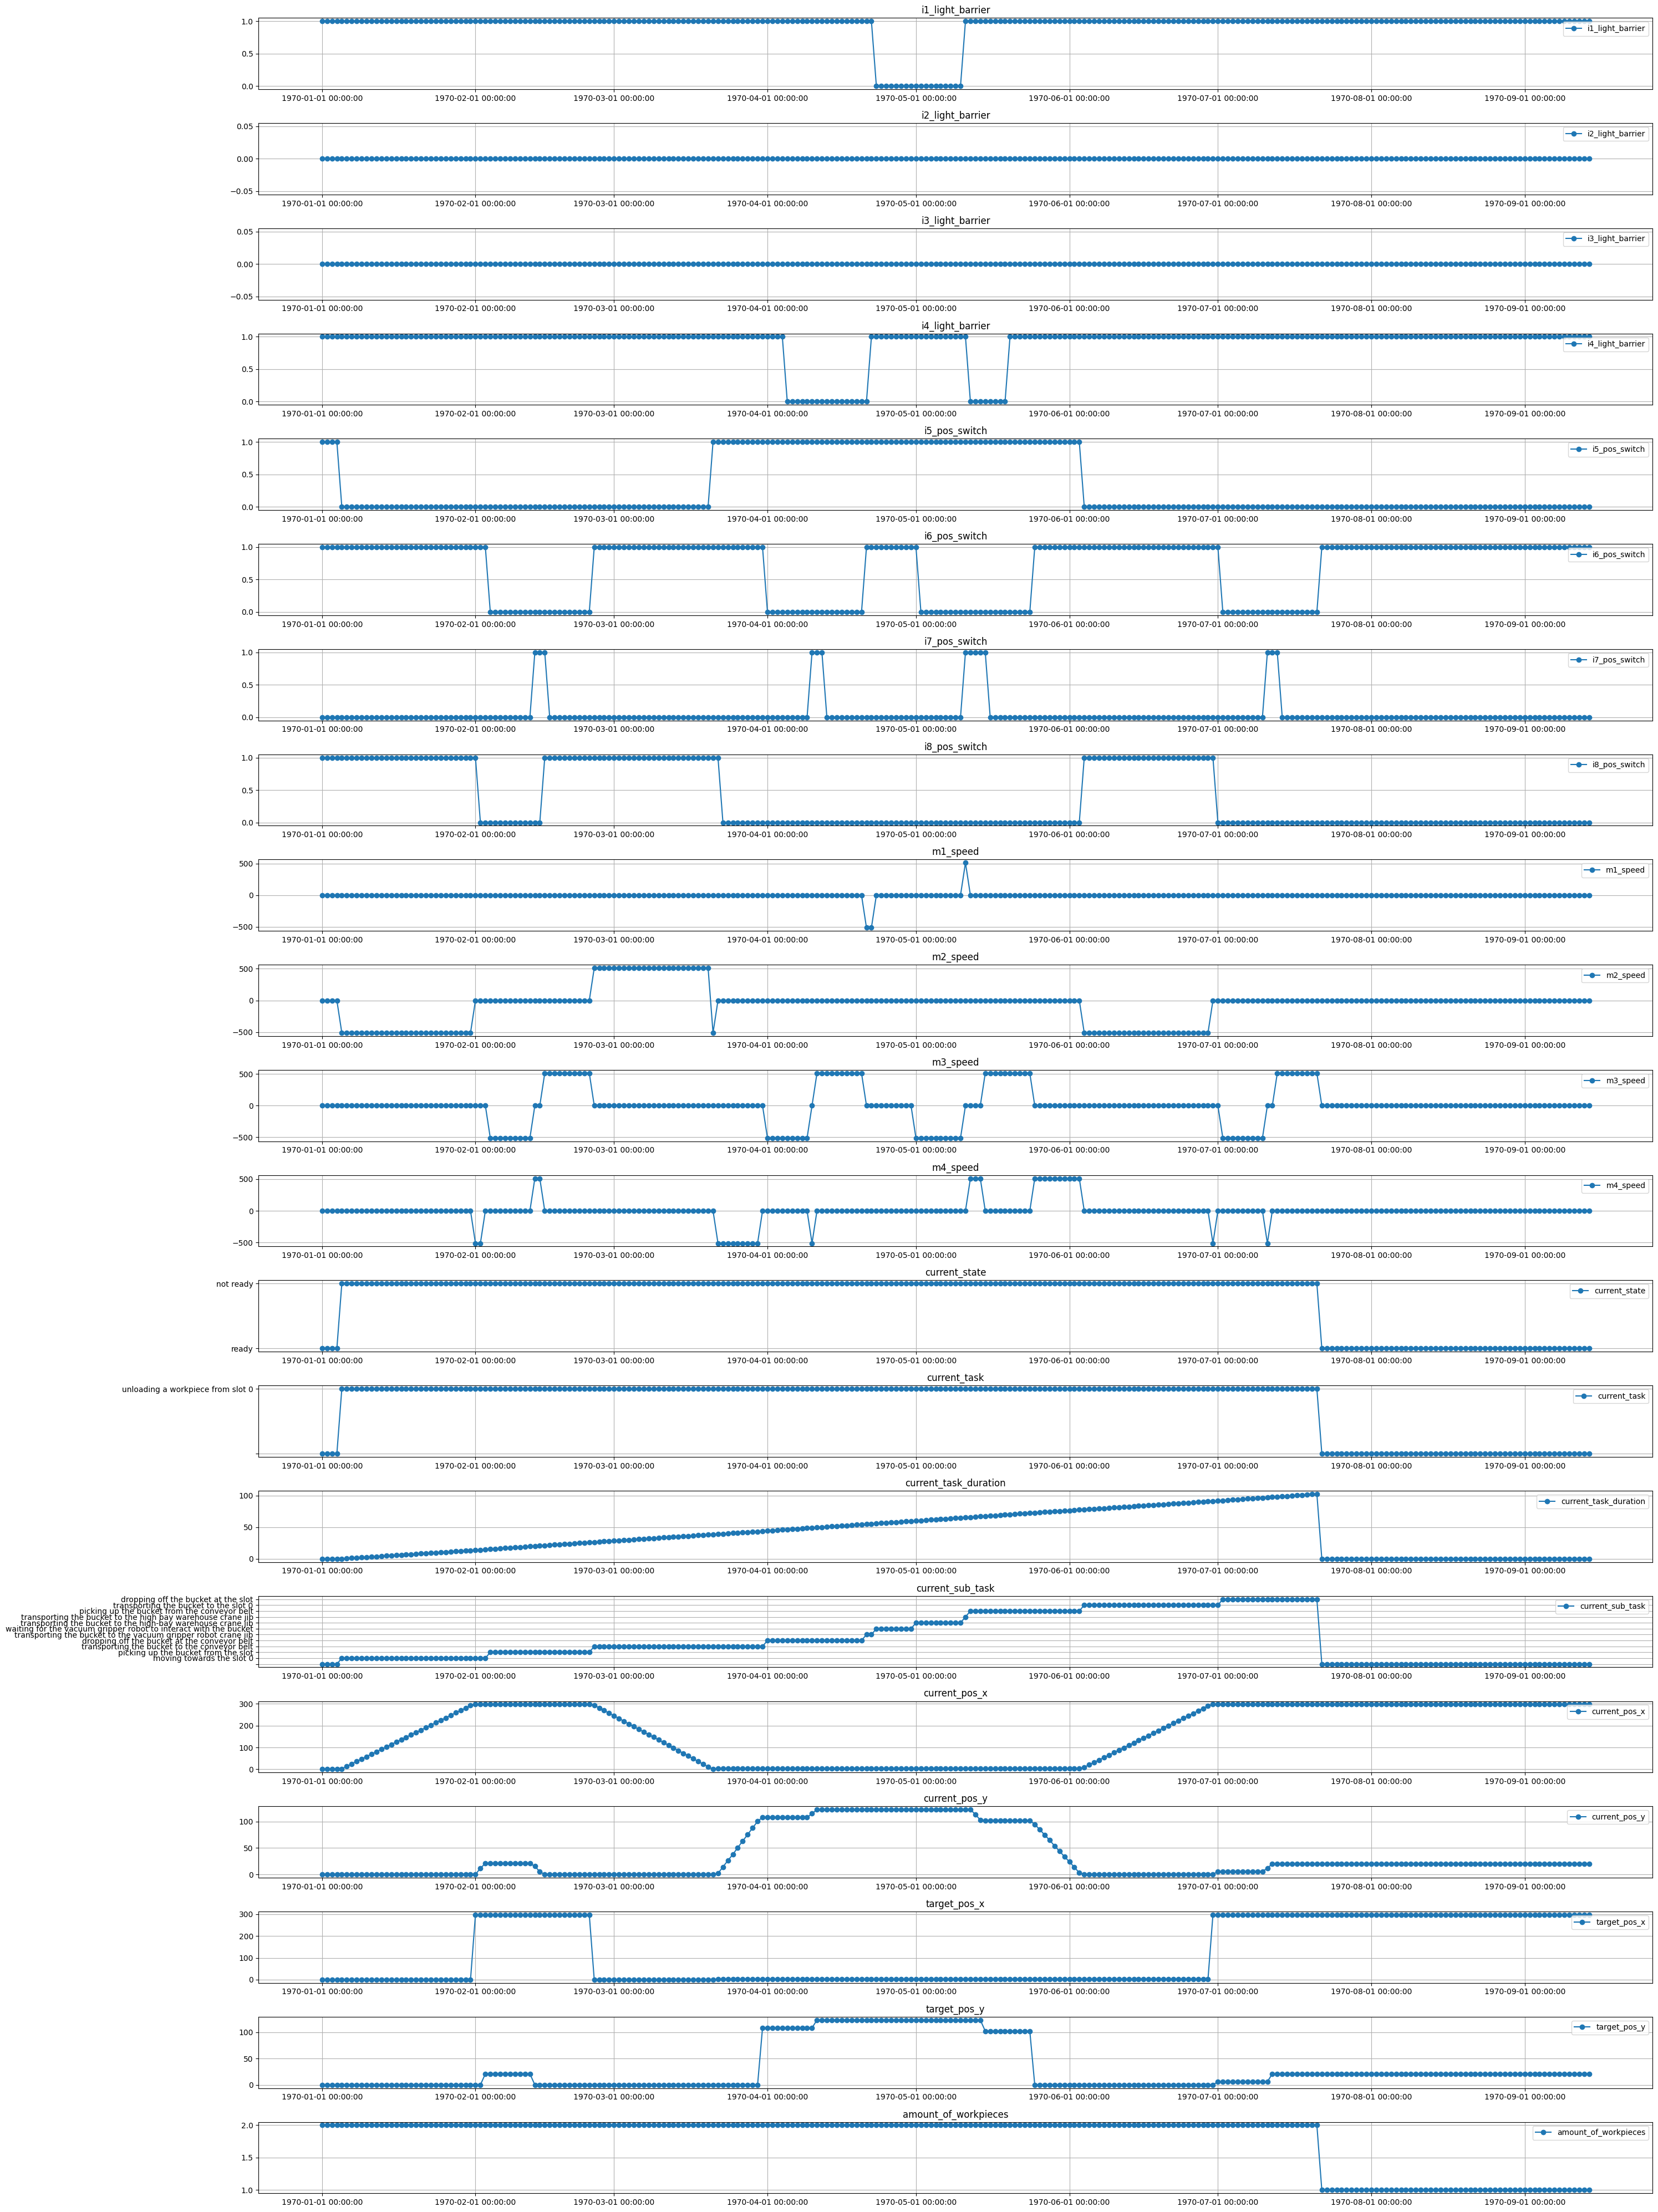

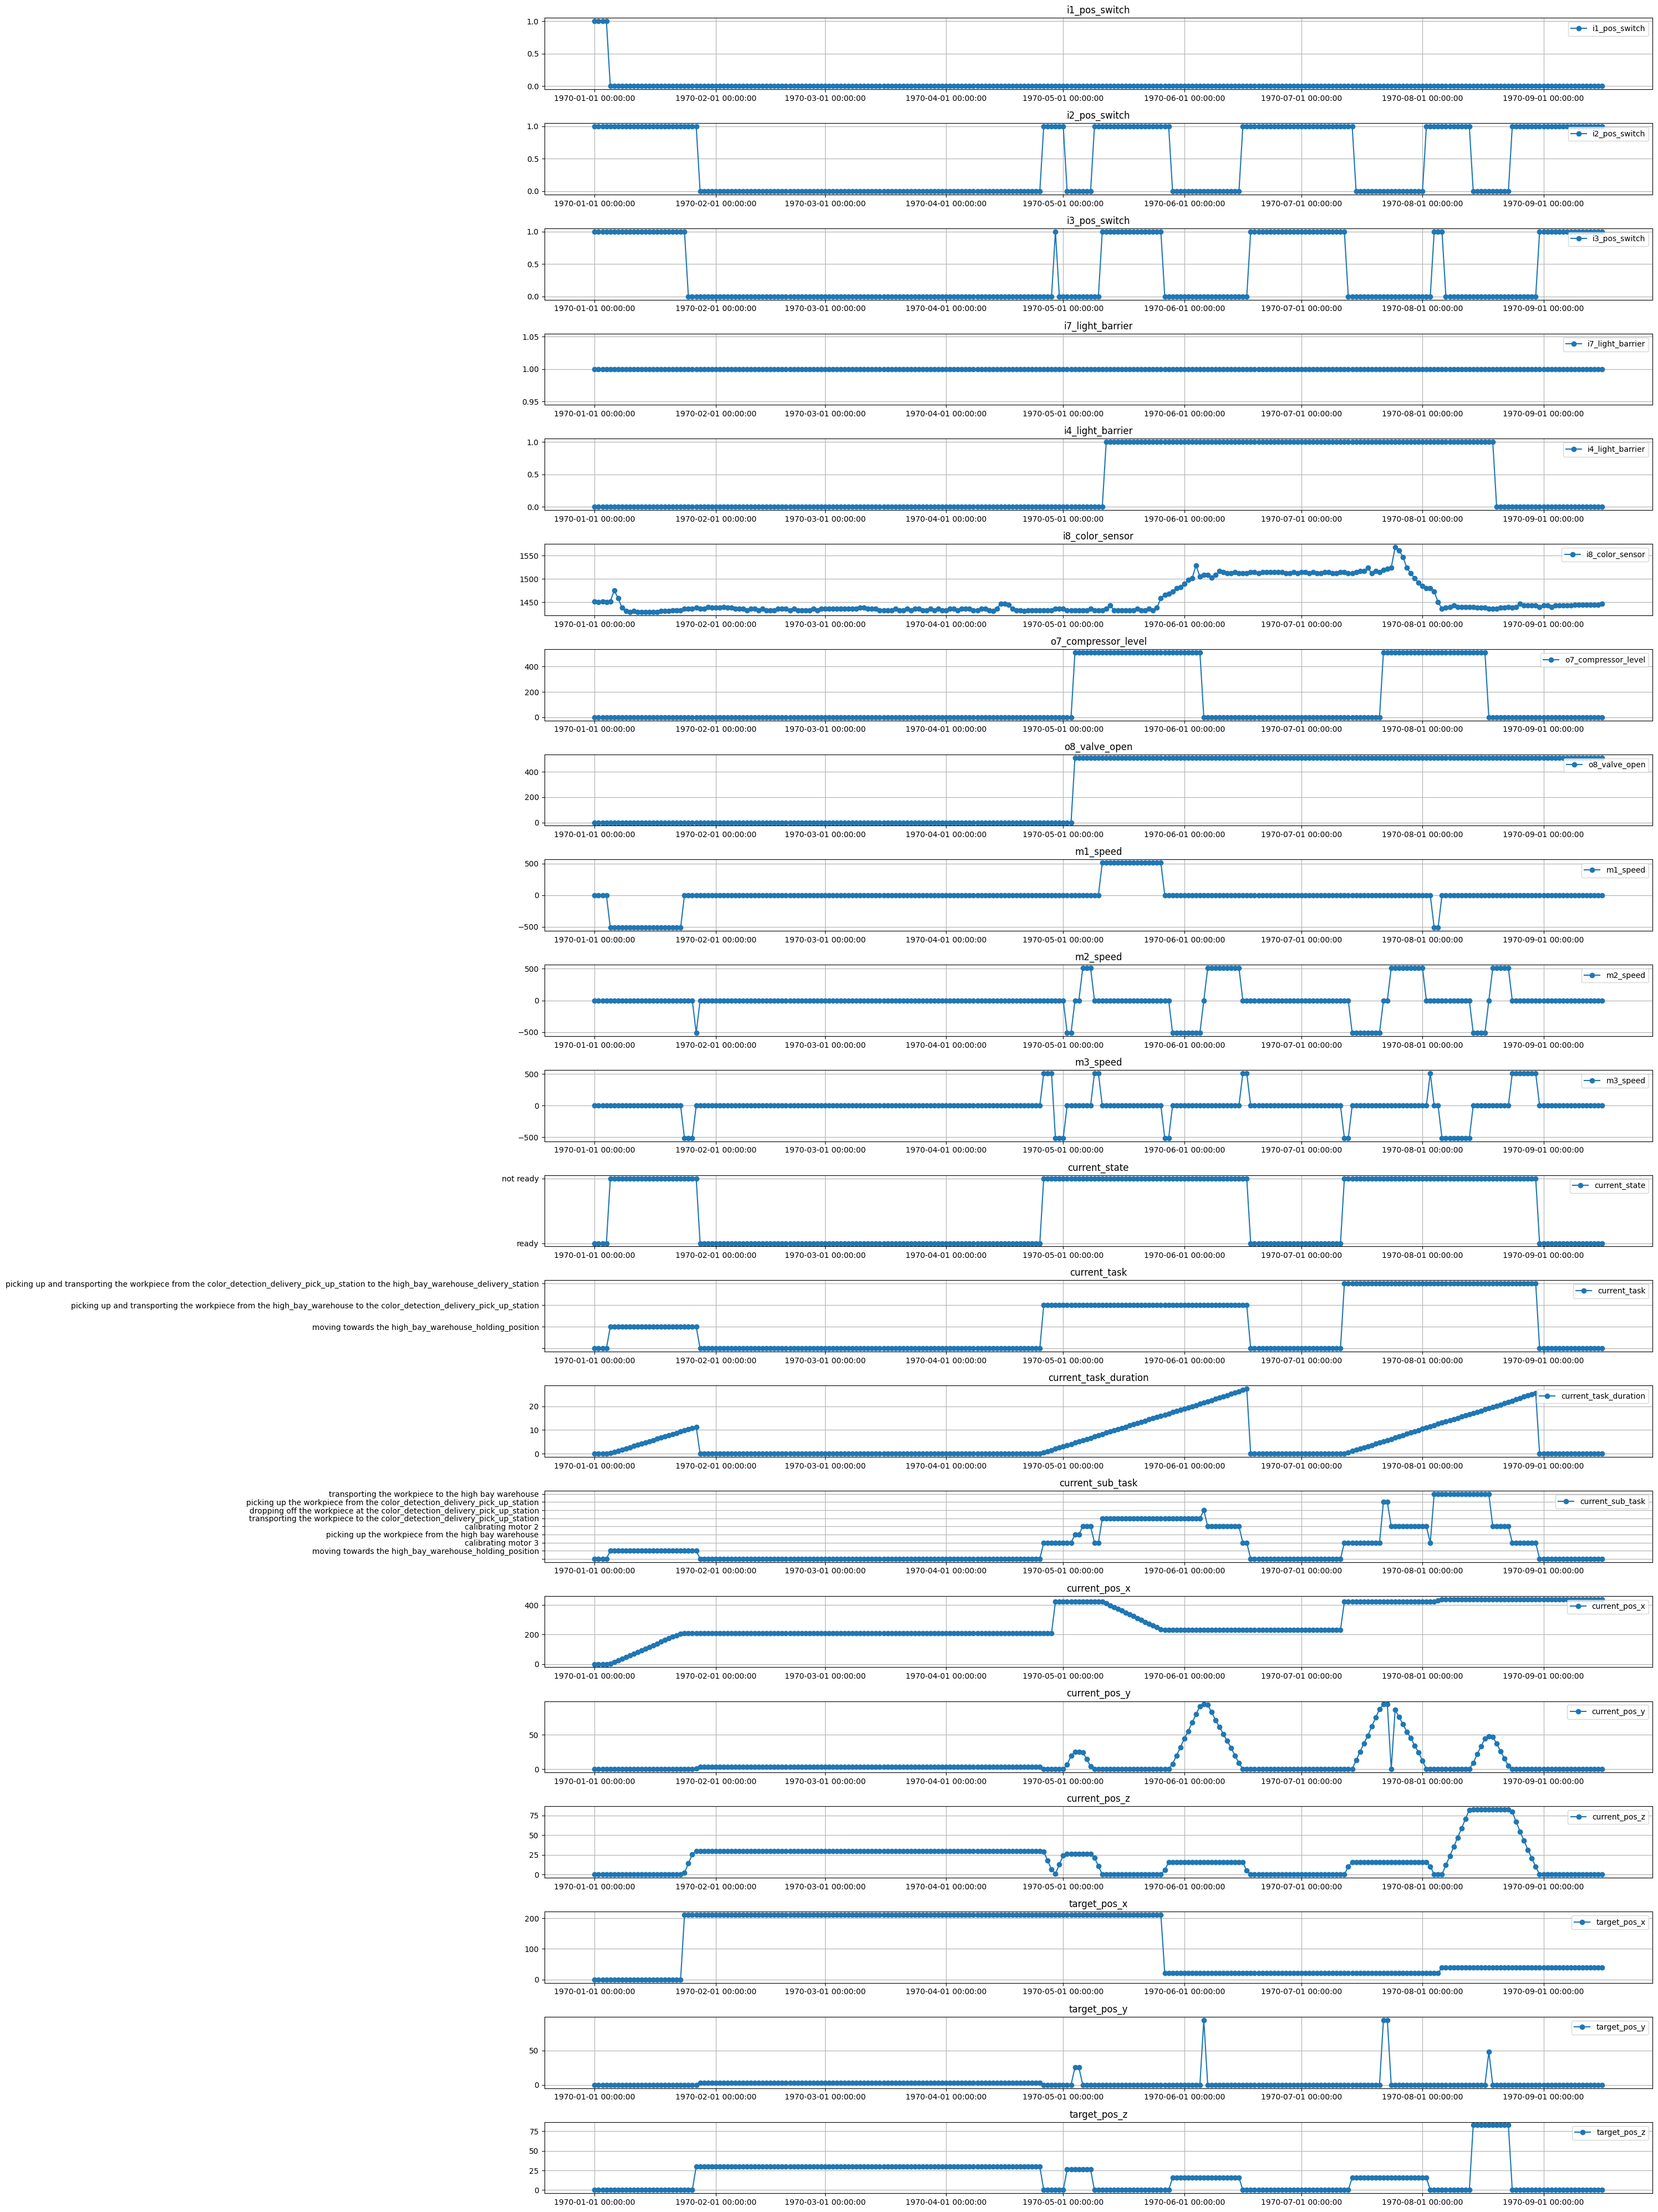

In [2]:
# Plot the data for each station
# Warehouse
create_plots(HBW_1_data)

In [ ]:
# Gripper Arm
create_plots(VGR_1_data)

In [ ]:
#create_plots(MM_1_data)
#create_plots(SM_1_data)
#create_plots(WT_1_data)
#create_plots(OV_1_data)